# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [ ]:
#Checking types and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             128355 non-null  int64  
 1   Month            128355 non-null  int64  
 2   Supplier         128331 non-null  object 
 3   ItemCode         128355 non-null  object 
 4   Description      128355 non-null  object 
 5   ItemType         128354 non-null  object 
 6   RetailSales      128355 non-null  float64
 7   RetailTransfers  128355 non-null  float64
 8   WarehouseSales   128355 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.8+ MB


In [ ]:
#Summary of data
data.describe()

,Year,Month,RetailSales,RetailTransfers,WarehouseSales
count,128355.000000,128355.000000,128355.000000,128355.000000,128355.000000
mean,2017.206030,7.079303,6.563037,7.188161,22.624213
std,0.404454,3.645826,28.924944,30.640156,239.693277
min,2017.000000,1.000000,-6.490000,-27.660000,-4996.000000
25%,2017.000000,5.000000,0.000000,0.000000,0.000000
50%,2017.000000,8.000000,0.330000,0.000000,1.000000
75%,2017.000000,10.000000,3.250000,4.000000,4.000000
max,2018.000000,12.000000,1616.600000,1587.990000,16271.750000


In [ ]:
#Check for missing values
data.isnull().sum()

Year                0
Month               0
Supplier           24
ItemCode            0
Description         0
ItemType            1
RetailSales         0
RetailTransfers     0
WarehouseSales      0
dtype: int64

In [10]:
#Handling missing values
data['Supplier'].fillna('Unknown Supplier', inplace=True)
data['ItemType'].fillna('Unknown Item', inplace=True)

In [11]:
#Check for duplicates
data.duplicated().sum()

0

## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [ ]:
#Sales by item type
sales_by_item= data.groupby('ItemType')[['RetailSales','RetailTransfers','WarehouseSales']].sum()
sales_by_item

,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
BEER,209763.11,234924.44,2437617.32
DUNNAGE,0.00,0.00,-45331.00
KEGS,0.00,0.00,43558.00
LIQUOR,309847.85,334176.41,33173.32
NON-ALCOHOL,8109.97,9058.37,8656.72
REF,281.34,171.92,-6754.00
STR_SUPPLIES,995.98,3594.70,0.00
Unknown Item,0.00,0.00,1.00
WINE,313400.42,340710.51,433009.47


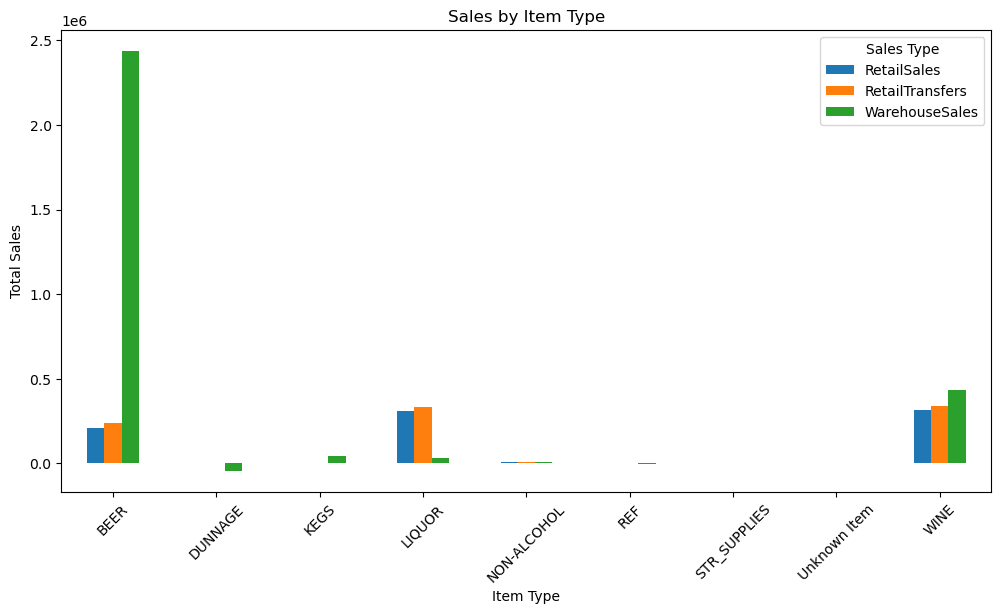

In [18]:
#Bar chart
sales_by_item.plot(kind='bar', figsize=(12,6))
plt.title('Sales by Item Type')
plt.ylabel('Total Sales')
plt.xlabel('Item Type')
plt.xticks(rotation=45)
plt.legend(title='Sales Type')
plt.show()


## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [ ]:
#Tip 10 suppliers with most retail sales
top_suppliers = data.groupby('Supplier')['RetailSales'].sum().nlargest(10)
top_suppliers

Supplier
E & J GALLO WINERY          67455.63
DIAGEO NORTH AMERICA INC    57656.36
CONSTELLATION BRANDS        54472.51
ANHEUSER BUSCH INC          42559.14
JIM BEAM BRANDS CO          39156.79
MILLER BREWING COMPANY      35022.63
BACARDI USA INC             28034.63
CROWN IMPORTS               26707.83
SAZERAC CO                  25772.63
THE WINE GROUP              25758.15
Name: RetailSales, dtype: float64

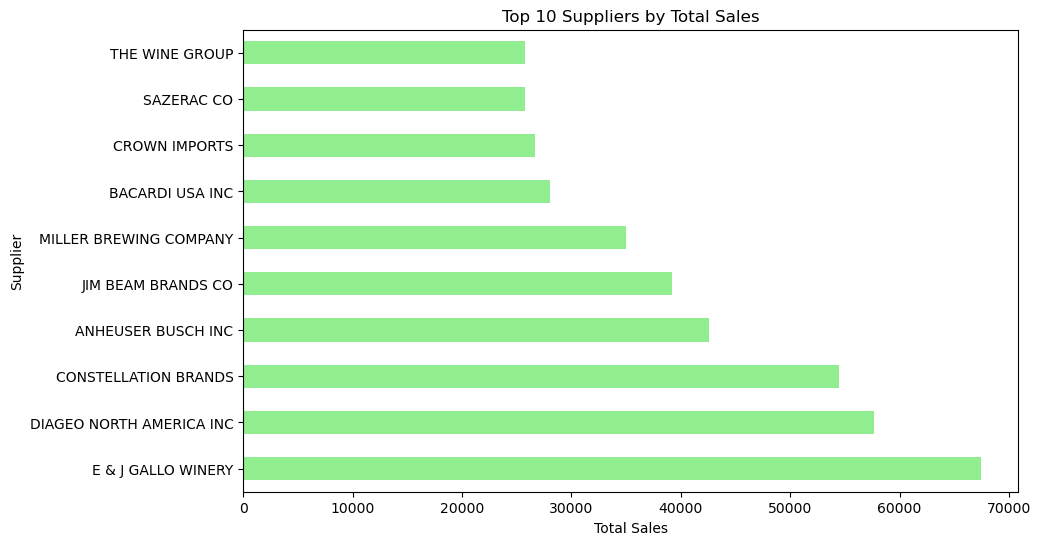

In [24]:
#Horizontal Bar chart
top_suppliers.plot(kind='barh', figsize=(10,6), color='lightgreen')
plt.title('Top 10 Suppliers by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Supplier')
plt.show()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [ ]:
#Transforming Year and Month 
data['Year-Month']= pd.to_datetime(data[['Year','Month']].astype(str).agg('-'.join, axis=1)).dt.strftime('%Y-%m')
#Averag Sales per Month
monthly_sales= data.groupby('Year-Month')[['RetailSales','RetailTransfers','WarehouseSales']].mean()
monthly_sales


,RetailSales,RetailTransfers,WarehouseSales
Year-Month,,,
2017-04,0.000000,15.707503,0.000000
2017-05,7.038838,7.421817,27.310548
2017-06,7.143914,6.950396,27.839069
2017-08,6.409991,6.584726,28.122641
2017-09,6.757254,6.419721,22.817909
2017-10,6.549021,6.827827,22.289367
2017-11,6.765496,7.103699,23.348862
2017-12,9.078241,8.353759,21.169463
2018-01,5.679413,5.574833,19.072137


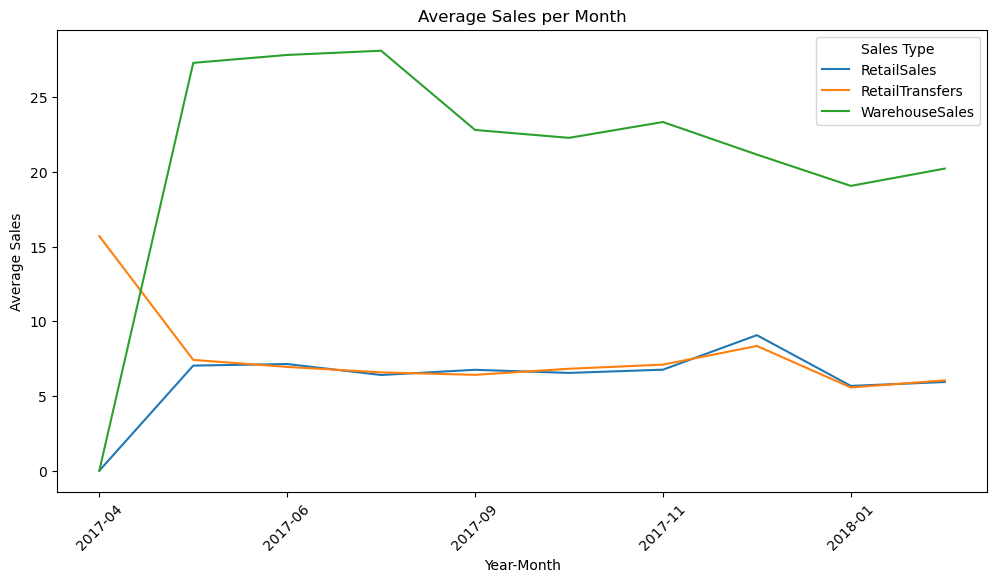

In [34]:
#Multi-line Chart
monthly_sales.plot(figsize=(12,6))
plt.title('Average Sales per Month')
plt.ylabel('Average Sales')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.legend(title='Sales Type')
plt.show()

## 4. Plot the same information as above but as a bar chart.

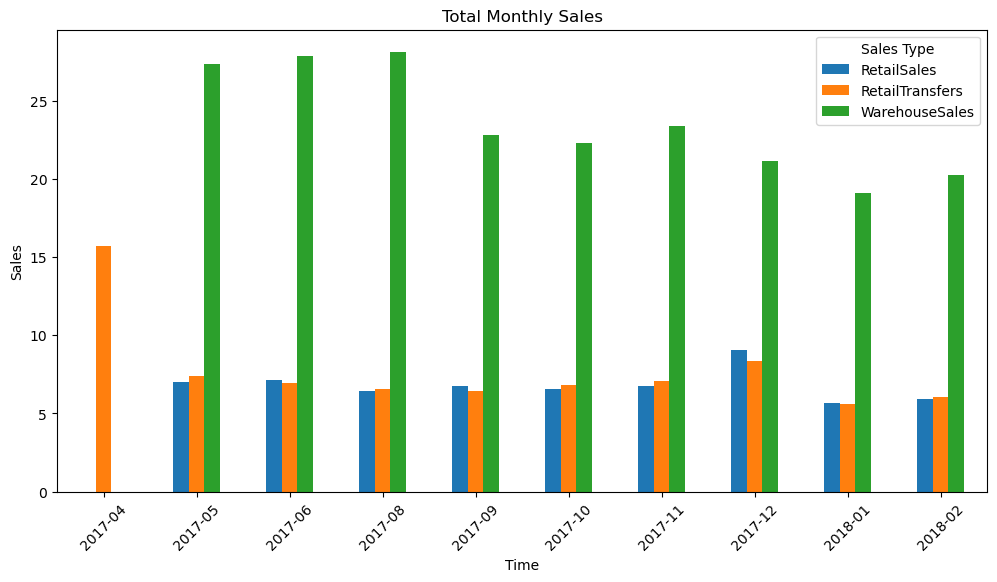

In [35]:
#Bar chart
monthly_sales.plot(kind='bar', figsize=(12,6))
plt.title('Total Monthly Sales')
plt.ylabel('Sales')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.legend(title="Sales Type")
plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [ ]:
#Monthly Retails sales by Item type
monthly_sales_by_item= data.groupby(['Year-Month', 'ItemType'])['RetailSales'].mean().unstack()
monthly_sales_by_item


ItemType,BEER,DUNNAGE,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,Unknown Item,WINE
Year-Month,,,,,,,,,
2017-04,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
2017-05,14.455945,NaN,NaN,12.136614,NaN,NaN,NaN,NaN,3.913331
2017-06,15.831398,0.0,0.0,11.937073,17.031408,6.120000,7.435000,NaN,3.964298
2017-08,13.145051,0.0,0.0,11.090986,16.287761,3.908000,5.949231,NaN,3.689469
2017-09,14.181189,0.0,0.0,11.191029,13.848750,5.554286,7.886667,NaN,3.990899
2017-10,12.817128,0.0,0.0,11.021571,13.509000,3.260000,6.490769,0.0,3.957538
2017-11,12.428722,0.0,0.0,11.774866,13.769726,9.015714,9.641818,NaN,4.211236
2017-12,16.065864,0.0,0.0,15.867440,18.033425,5.887143,31.402857,NaN,5.682273
2018-01,9.728371,0.0,0.0,9.485519,10.313380,3.380000,5.176364,NaN,3.678568


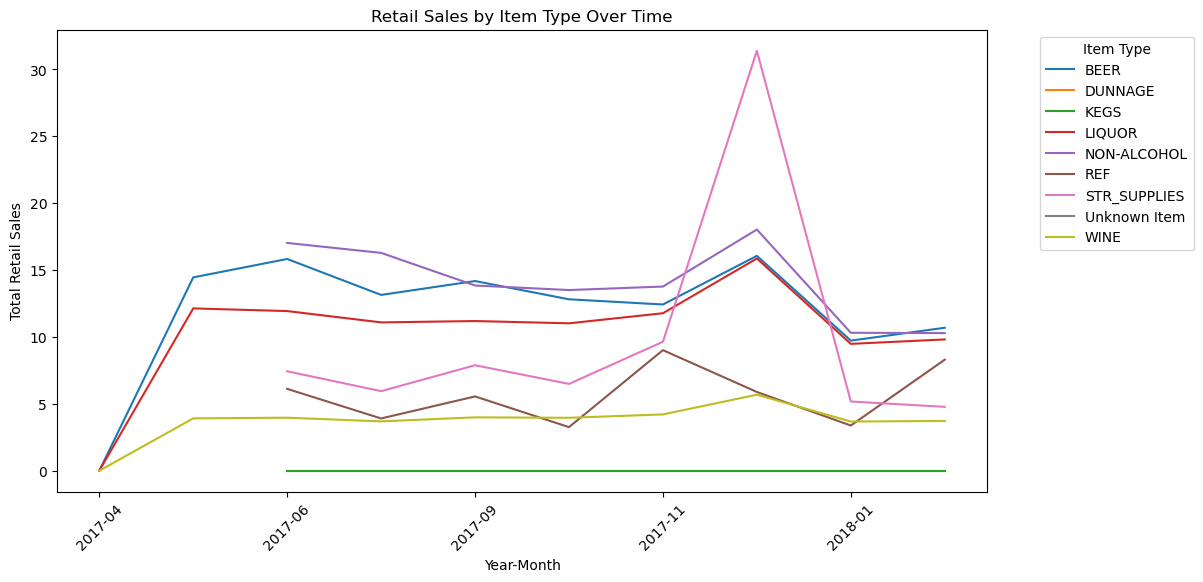

In [44]:
#Multi-line Chart
monthly_sales_by_item.plot(figsize=(12,6))
plt.title('Retail Sales by Item Type Over Time')
plt.ylabel('Total Retail Sales')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.legend(title="Item Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 6. Plot the same information as above but as a bar chart.

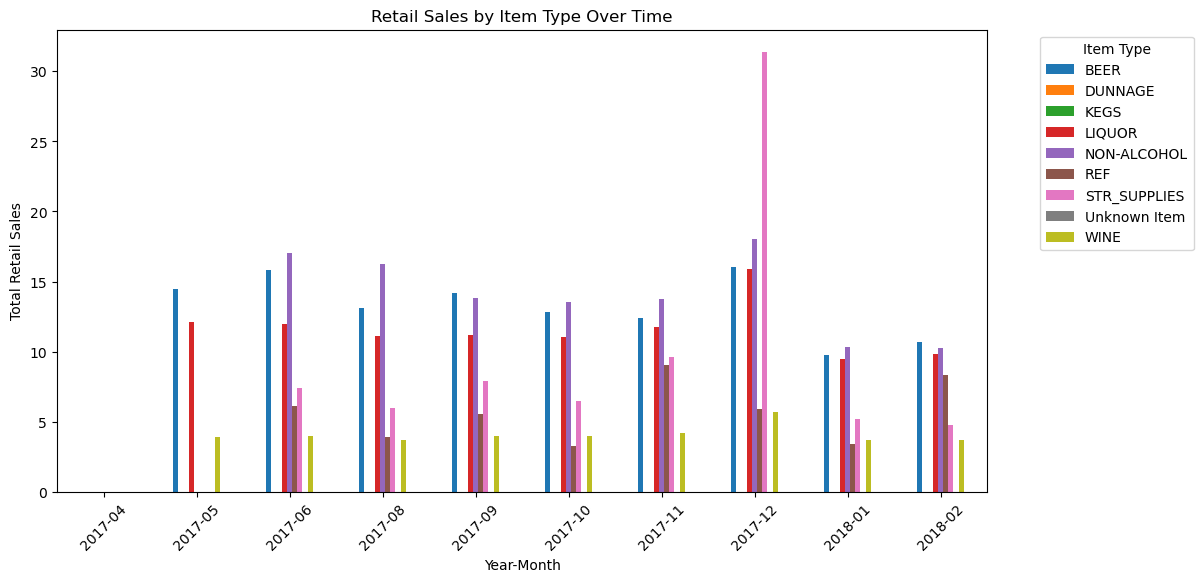

In [45]:
#Bar chart
monthly_sales_by_item.plot(kind='bar',figsize=(12,6))
plt.title('Retail Sales by Item Type Over Time')
plt.ylabel('Total Retail Sales')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.legend(title="Item Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

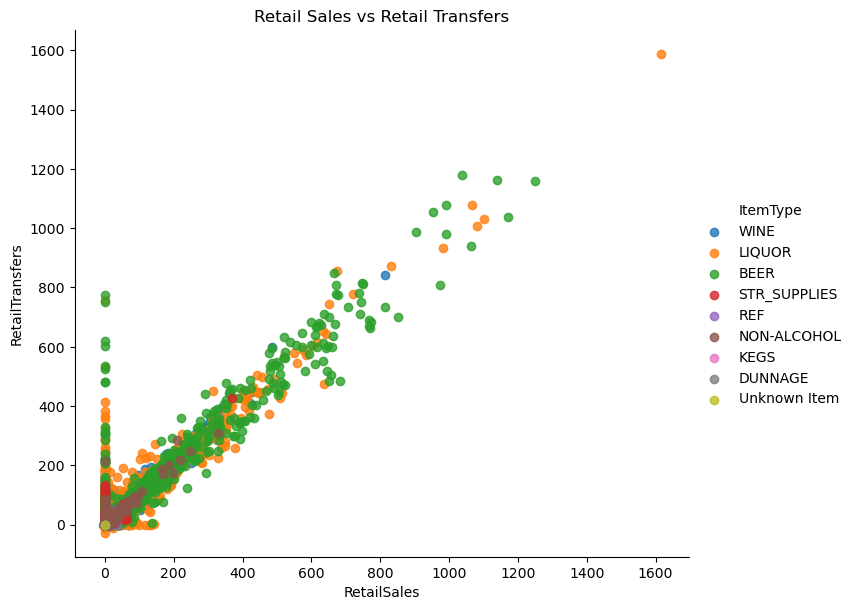

In [52]:
#Scatter plot
sns.lmplot(x='RetailSales', y='RetailTransfers', hue='ItemType', data=data, fit_reg=False, height=6, aspect=1.2)
plt.title('Retail Sales vs Retail Transfers')
plt.show()

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

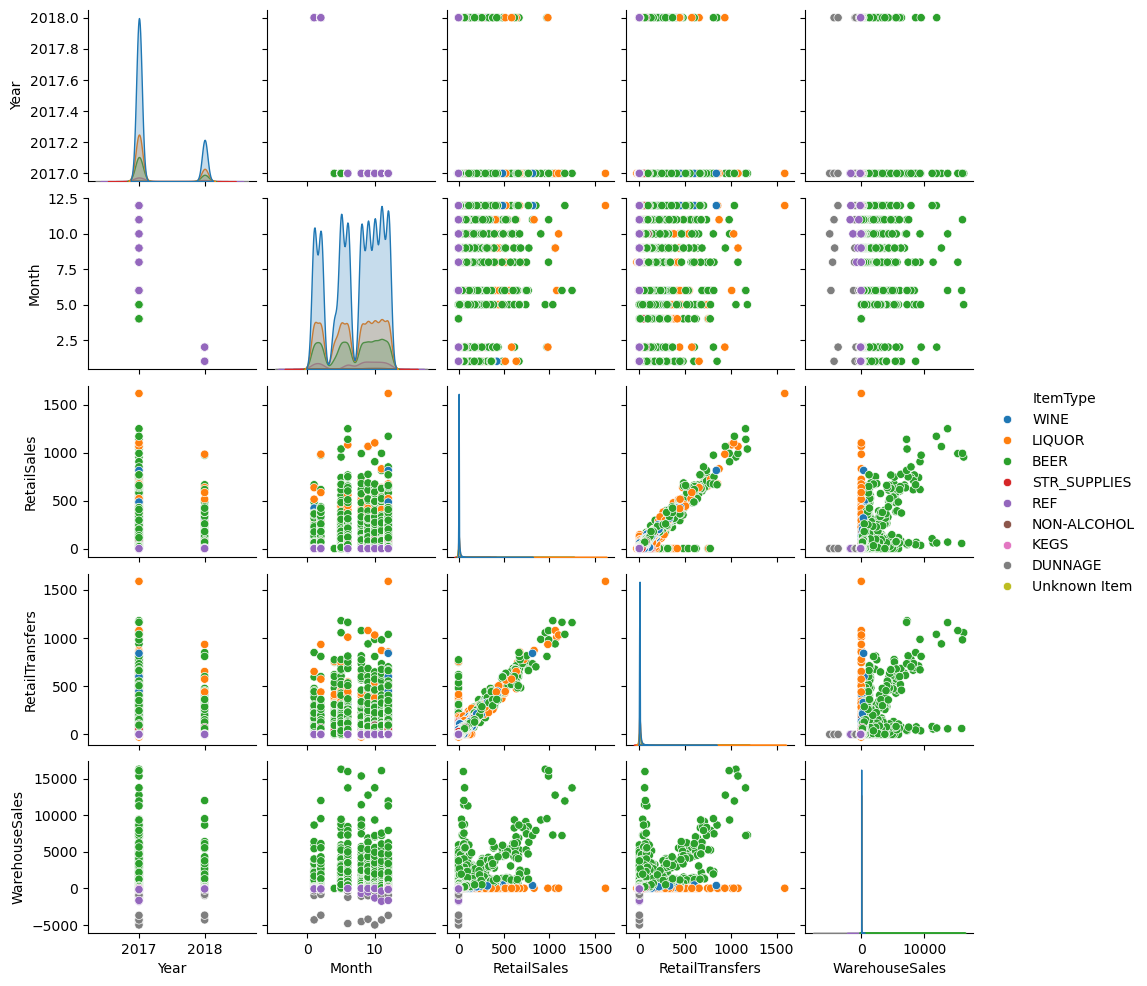

In [55]:
#Scatter matrix
sns.pairplot(data, hue='ItemType', diag_kind='kde', height=2)
plt.show()